In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
plt.rc('font', size=16)

In [4]:
def load_files(filename, model = 'FM2'):
    data = defaultdict(list)
    algos_set = False
    for i in range(1001):
        try:
            with open(filename % i, 'rb') as f:
                single = pickle.load(f)
        except:
            continue
        if not algos_set:
            algos = list(single.keys())
            algos_set = True
        for k, v in single.items():
            if not k.endswith('_e'):
                for dim in ['x', 'y']:
                    data[k + '_' + dim].append(v[dim])
            elif k.endswith('n_e'):
                data[k].append(v['e'])
            elif k.endswith('x_e'):
                data[k].append(v)

    algos.remove('truth')
    
    if model == 'FM3':
        algos.remove('BOLFI_median_e')
        algos.remove('BOLFI_mean_e')
        algos.remove('pax_e')
        
    df = pd.DataFrame(data)
    df['truth_r'] = (df['truth_x']**2 + df['truth_y']**2)**0.5
    
    print('Mean distance from true position over %d reconstructed events' % len(df))
    for algo in algos:
        df[algo + '_d'] = ((df[algo + '_x'] - df['truth_x'])**2 + (df[algo + '_y'] - df['truth_y'])**2)**0.5
        print(algo, "%.2f cm" % df[algo + '_d'].mean())
    
    return df, algos

In [12]:
df_bc_25, algos_1 = load_files("FM2_full_bc_25/bolfi_results_%d.pkl", 'FM2')
df_bc_10, algos_2 = load_files("FM2_full_bc_10/bolfi_results_%d.pkl", 'FM2')
df_eu_25, algos_3 = load_files("FM2_full_eu_25/bolfi_results_%d.pkl", 'FM2')
df_eu_10, algos = load_files("FM2_full_eu_10/bolfi_results_%d.pkl", 'FM2')
assert set(algos_1) == set(algos_2) == set(algos_3) == set(algos)

Mean distance from true position over 1000 reconstructed events
BOLFI_mode 1.42 cm
BOLFI_mean 0.74 cm
BOLFI_median 0.74 cm
PosRecNeuralNet 1.10 cm
PosRecTopPatternFit 0.83 cm
Mean distance from true position over 1000 reconstructed events
BOLFI_mode 2.04 cm
BOLFI_mean 1.09 cm
BOLFI_median 1.09 cm
PosRecNeuralNet 1.59 cm
PosRecTopPatternFit 1.20 cm
Mean distance from true position over 1000 reconstructed events
BOLFI_mode 1.30 cm
BOLFI_mean 0.79 cm
BOLFI_median 0.79 cm
PosRecNeuralNet 1.02 cm
PosRecTopPatternFit 0.74 cm
Mean distance from true position over 999 reconstructed events
BOLFI_median 1.16 cm
BOLFI_mean 1.16 cm
BOLFI_mode 1.91 cm
PosRecNeuralNet 1.60 cm
PosRecTopPatternFit 1.17 cm


# Histograms

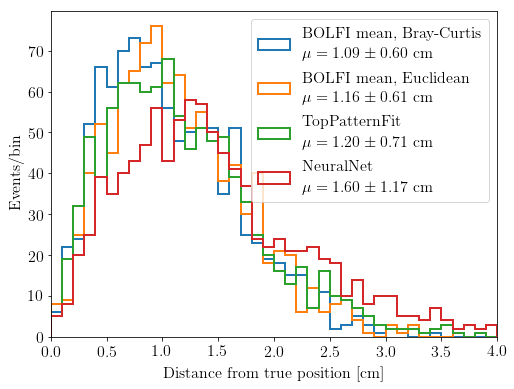

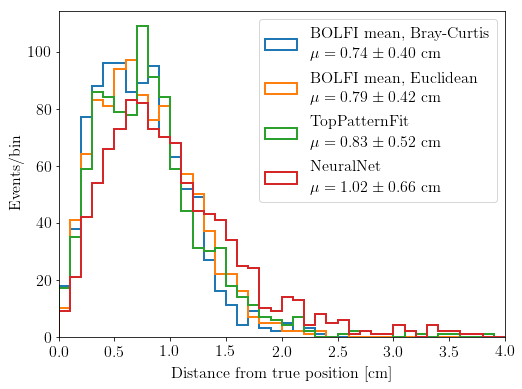

In [13]:
nbins = 40
hist_r = (0, 4)
r_cut = False

# FM2 paper plots s2_electrons = 10
plt.figure(figsize=(8,6))
for algo in ['BOLFI_mean', 'PosRecTopPatternFit', 'PosRecNeuralNet']:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    if algo == 'PosRecNeuralNet':
        pl_df = df_eu_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        std = pl_df[algo + '_d'].std()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    elif algo == 'PosRecTopPatternFit':
        pl_df = df_bc_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        std = pl_df[algo + '_d'].std()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    else:
        pl_df = df_bc_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        std = pl_df[algo + '_d'].std()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Bray-Curtis\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
        
        pl_df = df_eu_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        std = pl_df[algo + '_d'].std()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Euclidean\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
plt.legend(loc='upper right')
plt.xlabel('Distance from true position [cm]')
plt.ylabel('Events/bin')
plt.xlim(*hist_r)
if r_cut:
    plt.savefig('FM2_full_s2_electrons_10_r_30.png', bbox_inches='tight', dpi=150)
else:
    plt.savefig('FM2_full_s2_electrons_10.png', bbox_inches='tight', dpi=150)
plt.show()

# FM2 paper plots s2_electrons = 25
plt.figure(figsize=(8,6))
for algo in ['BOLFI_mean', 'PosRecTopPatternFit', 'PosRecNeuralNet']:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    if algo == 'PosRecNeuralNet':
        pl_df = df_eu_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        std = pl_df[algo + '_d'].std()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    elif algo == 'PosRecTopPatternFit':
        pl_df = df_bc_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        std = pl_df[algo + '_d'].std()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    else:
        pl_df = df_bc_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        std = pl_df[algo + '_d'].std()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Bray-Curtis\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
        
        pl_df = df_eu_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d'].mean()
        std = pl_df[algo + '_d'].std()
        plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Euclidean\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
plt.legend(loc='upper right')
plt.xlabel('Distance from true position [cm]')
plt.ylabel('Events/bin')
plt.xlim(*hist_r)
if r_cut:
    plt.savefig('FM2_full_s2_electrons_25_r_30.png', bbox_inches='tight', dpi=150)
else:
    plt.savefig('FM2_full_s2_electrons_25.png', bbox_inches='tight', dpi=150)
plt.show()

# Radial plot

In [14]:
dfs = {'df_bc_25': df_bc_25,
       'df_bc_10': df_bc_10,
       'df_eu_25': df_eu_25,
       'df_eu_10': df_eu_10,}

In [30]:
# test
bins = np.linspace(0, 47.9, 8+1)
grouped = df_bc_25.groupby(pd.cut(df_bc_25.truth_r, bins)).agg(['min', 'median', 'max'])

In [31]:
grouped

BOLFI_mean_x                      BOLFI_mean_y            \
                          min    median        max          min    median   
truth_r                                                                     
(0.0, 5.988]        -5.018003  0.591740   5.985456    -4.228571 -0.259095   
(5.988, 11.975]    -11.351708  0.979215  11.602168   -10.915079  2.018081   
(11.975, 17.962]   -18.391194  0.197579  17.015180   -17.574056 -2.756293   
(17.962, 23.95]    -23.641178 -0.159360  23.740972   -23.499073  3.280641   
(23.95, 29.938]    -28.085307  3.077751  30.409795   -29.253623 -0.679959   
(29.938, 35.925]   -35.208037 -0.381850  36.115560   -34.379542 -0.603051   
(35.925, 41.912]   -41.752929 -1.608304  41.404592   -40.550803 -0.680615   
(41.912, 47.9]     -46.537394  7.566740  46.336029   -46.480695  1.914013   

                            BOLFI_median_x                       \
                        max            min    median        max   
truth_r                                                           
(0.0, 5.988]       3.906554      -5.012424  0.549152   5.990592   
(5.988, 11.975]    9.711808     -11.333458  1.000334  11.587099   
(11.975, 17.962]  16.179725     -18.371152  0.152450  17.036799   
(17.962, 23.95]   23.449064     -23.612593 -0.106140  23.718731   
(23.95, 29.938]   29.568272     -28.068783  3.075626  30.436622   
(29.938, 35.925]  34.992756     -35.168369 -0.364438  36.129153   
(35.925, 41.912]  39.081660     -41.780073 -1.641189  41.399585   
(41.912, 47.9]    45.957549     -46.673328  7.582042  46.433214   

                 BOLFI_median_y    ...    BOLFI_mean_d BOLFI_median_d  \
                            min    ...             max            min   
truth_r                            ...                                  
(0.0, 5.988]          -4.239005    ...        1.180126       0.147725   
(5.988, 11.975]      -10.936838    ...        1.367954       0.070719   
(11.975, 17.962]     -17.590897    ...        1.251197       0.075318   
(17.962, 23.95]      -23.508360    ...        1.807507       0.025635   
(23.95, 29.938]      -29.223708    ...        2.108030       0.060054   
(29.938, 35.925]     -34.368373    ...        2.260659       0.007394   
(35.925, 41.912]     -40.537765    ...        2.315011       0.051771   
(41.912, 47.9]       -46.592797    ...        2.278790       0.028006   

                                     PosRecNeuralNet_d                      \
                    median       max               min    median       max   
truth_r                                                                      
(0.0, 5.988]      0.603070  1.216167          0.050790  0.855218  1.774295   
(5.988, 11.975]   0.730953  1.355684          0.160336  0.851765  2.600247   
(11.975, 17.962]  0.692509  1.252995          0.054380  0.664742  2.789112   
(17.962, 23.95]   0.594009  1.780796          0.028749  0.902424  3.729996   
(23.95, 29.938]   0.652146  2.080736          0.056484  0.982862  4.055311   
(29.938, 35.925]  0.678126  2.250643          0.063477  0.915394  4.698420   
(35.925, 41.912]  0.631064  2.327543          0.102092  0.954723  3.948211   
(41.912, 47.9]    0.842511  2.316444          0.054533  1.219972  8.930619   

                 PosRecTopPatternFit_d                      
                                   min    median       max  
truth_r                                                     
(0.0, 5.988]                  0.046863  0.649366  1.196307  
(5.988, 11.975]               0.153409  0.620763  1.444919  
(11.975, 17.962]              0.090461  0.615235  1.527208  
(17.962, 23.95]               0.046265  0.668968  1.974894  
(23.95, 29.938]               0.053061  0.720572  2.046983  
(29.938, 35.925]              0.030876  0.759140  2.052518  
(35.925, 41.912]              0.041224  0.698273  1.752457  
(41.912, 47.9]                0.068023  0.967562  4.751843  

[8 rows x 54 columns]

In [65]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [75]:
def get_rolling(df, algo, ws=100):
    test = df[['truth_r', algo + '_d']].sort_values('truth_r')
    roll = test.rolling(ws).agg([percentile(25), 'mean', percentile(75)]).dropna()
    rs = roll['truth_r']['mean']
    means = roll[algo + '_d']['mean']
    maxs = roll[algo + '_d']['percentile_75']
    mins = roll[algo + '_d']['percentile_25']
    return rs, mins, means, maxs

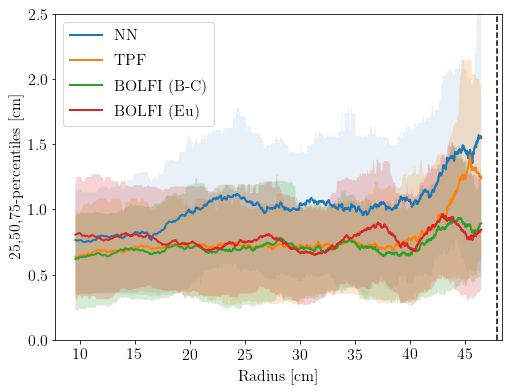

In [80]:
plt.figure(figsize=(8,6))
rs, mins, means, maxs = get_rolling(df_bc_25, 'PosRecNeuralNet')
plt.plot(rs, means, linewidth=2, label='NN')
plt.fill_between(rs, maxs, mins, alpha=0.1)

rs, mins, means, maxs = get_rolling(df_bc_25, 'PosRecTopPatternFit')
plt.plot(rs, means, linewidth=2, label='TPF')
plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_bc_25, 'BOLFI_mean')
plt.plot(rs, means, linewidth=2, label='BOLFI (B-C)')
plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_eu_25, 'BOLFI_mean')
plt.plot(rs, means, linewidth=2, label='BOLFI (Eu)')
plt.fill_between(rs, maxs, mins, alpha=0.2)

plt.axvline(47.9, color='k', linestyle='--')
plt.legend(loc='upper left')
plt.ylim(0, 2.5)
plt.xlabel('Radius [cm]')
plt.ylabel('25,50,75-percentiles [cm]')
plt.savefig('percentile_test.png', bbox_inches='tight', dpi=150)
plt.show()